# Step 1 - Data Exploration

## Installation and Imports

In [18]:
!pip install pandas
!pip install langdetect
!pip install seaborn
!pip install nltk

You should consider upgrading via the '/home/jade/.virtualenvs/kalido/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/jade/.virtualenvs/kalido/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 285 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/jade/.virtualenvs/kalido/bin/python -m pip install --upgrade pip' command.


In [21]:
import pandas as pd
from langdetect import detect, detect_langs
import seaborn as sns
import ntlk

In [2]:
!cat ./Data/VariableDefinitions.csv

## Load datasets and basic statistics

In [58]:
# Check out our training
train_df = pd.read_csv("./Data/Train.csv")
train_df.head(3)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa


In [59]:
# Check out test
test_df = pd.read_csv("./Data/Test.csv")
test_df.head(3)

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...


In [60]:
print("Number of training patterns: %d" % len(train_df))
print("Categories: %s" % str(train_df.category.unique()))
print("Number of test patterns: %d" % len(test_df))

Number of training patterns: 5151
Categories: ['Kitaifa' 'Biashara' 'michezo' 'Kimataifa' 'Burudani']
Number of test patterns: 1288


## How balanced are the news categories?

<AxesSubplot:xlabel='category', ylabel='count'>

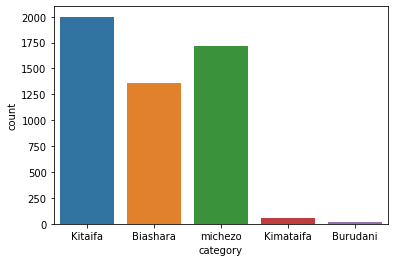

In [31]:
# Check how balanced our dataset is.
sns.countplot(x="category", data=train_df)

In [53]:
print("Number of Burudani patterns: %d" % len(train_df[train_df['category'] == 'Burudani']))
print("Number of Kimataifa patterns: %d" % len(train_df[train_df['category'] == 'Kimataifa']))

Number of Burudani patterns: 17
Number of Kimataifa patterns: 54


Based on the above, we can see that our dataset is heavily skewed towards "Kataifa", "Biashara" and "michezo" categories. With VERY FEW in the category of Burudani or Kimataifa

Bit of research:
- Kitaifa = National
- Biashara = Business
- Michezo = Sports
- Kimataifa = International
- Burudani = Entertainment

Number of nulls in content: 0


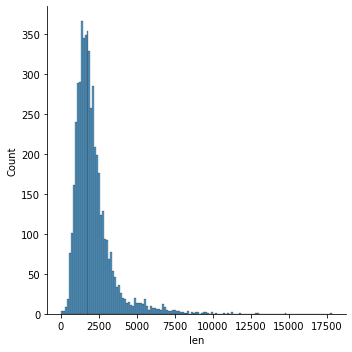

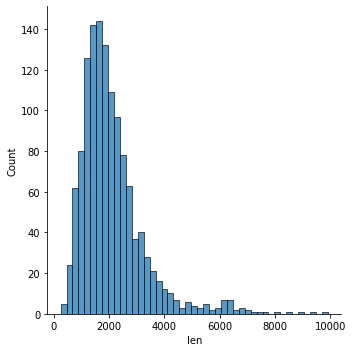

In [37]:
# Are there any nulls?
print("Number of nulls in content: %d" % train_df["content"].isna().sum())


# How large is the content of each news article in test? 
train_df['len'] = train_df['content'].apply(lambda x: len(x))
train_df['num_words'] = train_df['content'].apply(lambda x: len(x.split(" ")))

test_df['len'] = test_df['content'].apply(lambda x: len(x))
test_df['num_words'] = test_df['content'].apply(lambda x: len(x.split(" ")))

# Plot the length distributions.

sns.displot(train_df['len'])
sns.displot(test_df['len'])


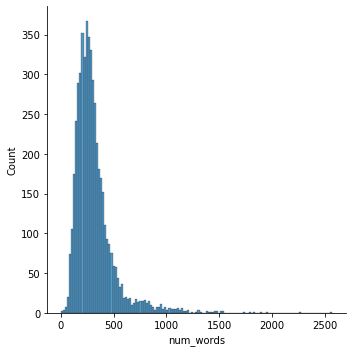

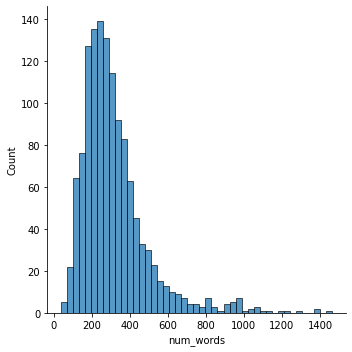

In [38]:
sns.displot(train_df['num_words'])
sns.displot(test_df['num_words'])

In [56]:
# What do the really small one's look like
train_df[train_df['len'] < 20]

,id,content,category,len,num_words,language_detection
2861,SW4225,.,Burudani,1,1,Failed
4906,SW724,['.'],michezo,5,1,Failed
5006,SW832,,Biashara,1,2,Failed


## Hypothesis: This dataset consists of Swahili language data only

In [42]:
#
def detectLang(cell):
    try:
        return detect(cell)
    except:
        return "Failed"

train_df['language_detection'] = train_df['content'].apply(lambda x: detectLang(x))
test_df['language_detection'] = test_df['content'].apply(lambda x: detectLang(x))
train_df

,id,content,category,len,num_words,language_detection
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,1584,233,sw
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,1317,187,sw
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,2610,394,sw
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,1404,213,sw
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,2247,336,sw
...,...,...,...,...,...,...
5146,SW993,RAIS John Magufuli ameendelea kung’ara katika...,Kitaifa,6742,1041,sw
5147,SW994,KAMPENI inayohimiza watafi ti kuandika upya h...,Kitaifa,2348,330,sw
5148,SW996,"MATUKIO mapya ya malaria kwa kila watu 1,000 ...",Kitaifa,3014,450,sw
5149,SW997,IMEELEZWA kuwa hakuna sheria yoyote inayokata...,Kitaifa,1216,195,sw


<AxesSubplot:xlabel='language_detection', ylabel='count'>

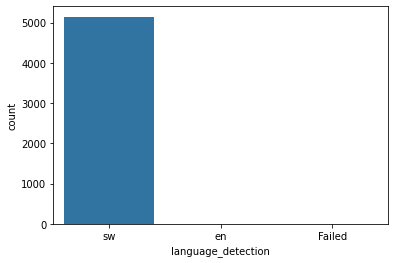

In [45]:
sns.countplot(x="language_detection", data=train_df)

In [47]:
train_df[train_df['language_detection'] == 'en']

,id,content,category,len,num_words,language_detection
2267,SW3552,.Wizkid ameshinda tuzo kubwa za Marekani za So...,Burudani,215,30,en


In [48]:
train_df[train_df['language_detection'] == 'Failed']

,id,content,category,len,num_words,language_detection
2861,SW4225,.,Burudani,1,1,Failed
4906,SW724,['.'],michezo,5,1,Failed
5006,SW832,,Biashara,1,2,Failed


<AxesSubplot:xlabel='language_detection', ylabel='count'>

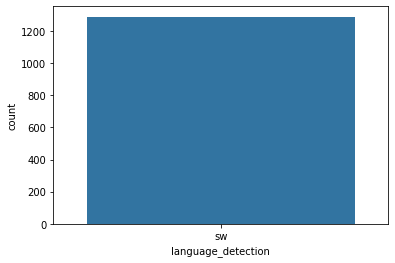

In [44]:
sns.countplot(x="language_detection", data=test_df)

## Do we have any data leakage?
i.e. Do we have data in our test set that's identical to our training set which would give inflated performance?


In [63]:
train_set = set(train_df['content'])
test_set = set(test_df['content'])
train_set.intersection(test_set)

set()

# Summary of Findings
- We have just over 5000 training patterns and just over 1000 test patterns.
- We have 5 categories with large skew towards 3 of them. The remaining 2 categories have very little data
- Majority of categories have length between 0 and 500 characters, with a tail that extends to 2500. This occurs in both test and training
- The data is in Swahili safe for 3 very short patterns that do not appear to be valid text.
- There is no data leakage between train and test